## Belief Networks

In [1]:
import graphviz as gz
import numpy as np

Belief networks are a way to depict the independence assumptions made in a distribution.

### Wet Grass Example (3.1.1)
$
\begin{align}
    R &\in {0,1} \quad &&\text{R = 1 means that it has been raining, and 0 otherwise} \\
    S &\in {0,1} \quad &&\text{S = 1 means that sprinkler was left on, and 0 otherwise} \\
    J &\in {0,1} \quad &&\text{J = 1 means that Jack's grass is wet, and 0 otherwise} \\
    T &\in {0,1} \quad &&\text{T = 1 means that Tracey's grass is wet, and 0 otherwise} \\
\end{align}
$

A model of the world corresponds to $p(T,J,R,S)$. One way to decompose this joint distribution is

$
\begin{align}
    p(T,J,R,S) &= p(T \mid J,R,S)p(J,R,S) \\
               &= p(T \mid J,R,S)p(J \mid R,S)p(R,S) \\
               &= p(T \mid J,R,S)p(J \mid R,S)p(R \mid S)p(S) \\
\end{align}
$

There may be other decompositions. For example, instead of conditioning on $J,R,S$ combined, we could have conditioned on $T,J,R$. However, in this example, conditioning in this way allows us to incorporate our independence assumptions into the model.

#### Conditional Independence Assumption 1
We assume that whether Tracey's grass is wet or not does not **directly depend** on whether Jack's grass is wet or not. That is $p(T \mid J,R,S) = p(T \mid R,S)$.

#### Conditional Independence Assumption 2
We assume that whether Jack's grass is wet or not does not **directly depend** on whether Tracey's sprinkler was left on or not. That is $p(J \mid R,S) = p(J \mid R)$.

#### Conditional Independence Assumption 3
We assume that rain does not **directly depend** on whether sprinkler was left on or not. That is $p(R \mid S) = p(R)$.

#### Final Model
In the end, our model of the world becomes

$$
p(T,J,R,S) = p(T \mid R,S)p(J \mid R)p(R)p(S)
$$

To completely specify the model, we need $2^2 + 2^1 + 2^0 + 2^0 = 8$ probability values in total.

#### Corresponding Bayesian Belief Network

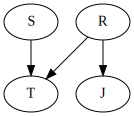

In [2]:
G = gz.Digraph()
G.edge('R', 'T')
G.edge('S', 'T')
G.edge('R', 'J')
G

Parents of node $T$ are the variables that $T$ is dependent ($R$ and $S$).

#### Complete Model
We specify all of the 8 values to complete our model.

$
\begin{align}
    &p(R = 1) &&= 0.2 \\
    &p(S = 1) &&= 0.1 \\
    &p(J = 1 \mid R = 1) &&= 1 \\
    &p(J = 1 \mid R = 0) &&= 0.2 \\
    &p(T = 1 \mid R = 1, S = 0) &&= 1 \\
    &p(T = 1 \mid R = 1, S = 1) &&= 1 \\
    &p(T = 1 \mid R = 0, S = 1) &&= 0.9 \\
    &p(T = 1 \mid R = 0, S = 0) &&= 0 \\
\end{align}
$

which can be written as follows:

In [3]:
"""
   T | 0   1
 R,S |
 -------------
 0,0 | 1   0
 0,1 | 0.1 0.9
 1,0 | 0   1
 1,1 | 0   1
"""

p_R = np.array([0.8, 0.2])
p_S = np.array([0.9, 0.1])
p_J_given_R = np.array([[0.8, 0.2],
                        [0, 1]])
p_T_given_R_S = np.array([[1, 0],
                          [0.1, 0.9],
                          [0, 1],
                          [0, 1]])

#### Inference
After specifying the complete model, we can make inference by manipulating the expressions and using the values we have specified. For example,

$
\begin{align}
    p(S = 1 \mid T = 1, J = 1) &= \sum_R p(S = 1, R \mid T = 1, J = 1) \\
                               &= \frac{\sum_R p(S = 1, R, T = 1, J = 1)}{p(T = 1, J = 1)} \\
                               &= \frac{\sum_R p(S = 1, R, T = 1, J = 1)}{\sum_{R,S} p(T = 1, J = 1, R, S)} \\
                               &= \frac{\sum_R p(T = 1 \mid R, S = 1)p(J = 1 \mid R)p(R)p(S = 1)}{\sum_{R,S} p(T = 1 \mid R, S)p(J = 1 \mid R)p(R)p(S)} \\
\end{align}
$

In [4]:
j1r = p_J_given_R[:, 1]
t1rs1 = p_T_given_R_S[[1, 3], 1]
r = p_R
s1 = p_S[1]
nom = np.sum(j1r*t1rs1*r*s1)

$p(J = 1 \mid R)$ = {{j1r}}

$p(T = 1 \mid R, S = 1)$ = {{t1rs1}}

$p(R)$ = {{r}}

$p(S = 1)$ = {{s1}}

$\sum_R p(J = 1 \mid R)p(T = 1 \mid R, S = 1)p(R)p(S = 1)$ = {{nom}}

In [5]:
j1r1 = p_J_given_R[1, 1]
t1r1s = p_T_given_R_S[2:, 1]
r1 = p_R[1]
s = p_S
j1r0 = p_J_given_R[0, 1]
t1r0s = p_T_given_R_S[:2, 1]
r0 = p_R[0]
denom = np.sum(j1r1*t1r1s*r1*s + j1r0*t1r0s*r0*s)

1. ** R = 1 case **
  * $p(J = 1 \mid R = 1)$ = {{j1r1}}
  * $p(T = 1 \mid R = 1, S)$ = {{t1r1s}}
  * $p(R = 1)$ = {{r1}}
  * $p(S)$ = {{s}}

2. ** R = 0 case **
  * $p(J = 1 \mid R = 0)$ = {{j1r0}}
  * $p(T = 1 \mid R = 0, S)$ = {{t1r0s}}
  * $p(R = 0)$ = {{r0}}
  * $p(S)$ = {{s}}

$\sum_{R,S} p(J = 1 \mid R)p(T = 1 \mid R, S)p(R)p(S)$ = {{denom}}

In [6]:
nom/denom

0.16044776119402987

$p(S = 1 \mid T = 1, J = 1)$ = {{nom/denom}}

### Uncertain Evidence and Jeffrey's Rule
We don't know the exact state of the evidence variable, i.e. we have a probability distribution over the evidence variable. For example, if $dom(x) = \{red, blue, green\}$,
* **certain evidence** would give us a distribution of (0, 1, 0),
* **uncertain evidence** gives us a distribution of (0.2, 0.3, 0.5).

Performing inference with soft evidence can be achieved using Bayes' rule. For example, let our model be $p(x, y)$ and that we have some soft (uncertain) evidence $\tilde{y}$ about the variable $y$. We want to know how our beliefs are going to change with this new evidence, i.e. we want to calculate $p(x \mid \tilde{y})$.

#### Jeffrey's Rule
$$
p(x \mid \tilde{y}) = \sum_y p(x, y \mid \tilde{y}) = \sum_y p(x \mid y, \tilde{y})p(y \mid \tilde{y}) = \sum_y p(x \mid y)p(y \mid \tilde{y}).
$$

Here, $p(y = i \mid \tilde{y})$ represents the probability that $y$ is in state $i$ given the soft-evidence. For example, assume $dom(x) = \{red, blue, green\}$ and the soft evidence $\tilde{x}$ gives us the distribution $(0.2, 0.3, 0.5)$. Then, $p(x = blue \mid \tilde{x}) = 0.3$.

#### Example 3.2
$
\begin{align}
p(B = tr \mid W = tr, \tilde{G}) &= p(B = tr \mid W = tr, G)p(G \mid \tilde{G}) \\
                                 &= p(B = tr \mid W = tr, G = tr)p(G = tr \mid \tilde{G}) + p(B = tr \mid W = tr, G = fa)p(G = fa \mid \tilde{G}).
\end{align}
$

### Unreliable Evidence
We have evidence about $G$ but we are unsure about its accuracy. To solve this problem, we replace rv $G$ with a new variable $H$ such that

$
p(G \mid A) \rightarrow p(H \mid A), \quad \text{ where } p(H \mid A) = \begin{cases}
                                                                            0.8,& A = tr \\
                                                                            0.2,& A = fa \\
                                                                        \end{cases}
$

Hence, our new joint probability becomes $p(B, A, H, W) = p(A \mid B)p(B)p(W \mid A)p(H \mid A)$. $H$ is arbitrary and fixed, and its value doesn't change $p(H \mid A)$. Here, we use $p(H \mid A)$ to simply replace the evidence about $G$ with our own beliefs.

### Formal Definition
A belief network is a distribution of the form
$$
p(x_1, \dots, x_D) = \prod_{i=1}^D p(x_i \mid pa(x_i))
$$
where $pa(x_i)$ represents the parental variables of $x_i$. Represented as a digraph with arrows pointing from parents to children, a belief network corresponds to a **Directed Acyclic Graph (DAG)**, with the $i^{th}$ node in the graph corresponding to the factor $p(x_i \mid pa(x_i))$.

A BBN specifies which variables are the 'direct causes' of which variable, namely $pa(x_i)$ are the 'direct causes' of $x_i$. However, this does not necassarily mean that $x_i$ and $pa(pa(x_i))$ are independent.

#### BBN Example

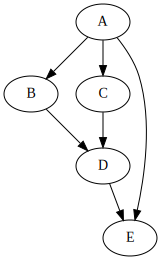

In [7]:
G = gz.Digraph()
G.edges(['AB', 'AC', 'AE', 'CD', 'BD', 'DE'])
G

corresponds to the following model
$$
p(A, B, C, D, E) = p(E \mid A, D)p(D \mid B, C)p(B \mid A)p(C \mid A)p(A)
$$

#### Same Distribution Multiple Graphs
Multiple BBNs may correspond to the same probability distribution. This can easily be verified by the following example
$$
p(x_1, x_2, x_3) = p(x_1 \mid x_2, x_3)p(x_2 \mid x_3)p(x_3) = p(x_3 \mid x_1, x_2)p(x_2 \mid x_1)p(x_1)
$$

#### Algorithm to Construct BBN on variables $x_1, \dots, x_n$
Suppose we have the joint distribution $p(x_1, \dots, x_n)$. Then an algorithm to construct a BBN is

1. write down the $n$-node cascade BBN,
2. label the nodes with the variables in any order,
3. if variables $x_i$ and $x_j$ are independent, delete the edge between $x_i$ and $x_j$.

#### Dependencies and the Markov Blanket
Consider a distribution on a set of variables $X$, the corresponding BBN DAG $G$, and $x_i \in X$. Let $MB(x_i)$ be the set of variables in the Markov Blanket of $x_i$. Then, for any variable $y \in X \setminus \{x_i \cup MB(x_i)\}, x_i \ci y \mid MB(x_i)$. That is, Markov Blanket of $x_i$ carries all information about $x_i$.

Graphical dependence doesn't always mean actual dependence. Specific distribution instances may result in graphically dependent variables being independent.

#### Collisions and Conditional Independence
Given a path $P$, a **collider** is a node $c$ on $P$ with neighbors $a$ and $b$ such that $a \rightarrow c \leftarrow b$. A collider is a path specific, i.e. a node can be a collider on path $P_1$ but may not be a collider on path $P_2$.

##### non-collider $z$ which is conditioned along the path between $x$ and $y$
This path cannot induce dependence between $x$ and $y$ since $z$ gives all the information about $y$ that $x$ could give.

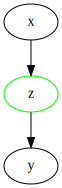

In [8]:
G = gz.Digraph()
G.node('z', color='green')
G.edges(['xz', 'zy'])
G

##### collider $z$ along the path which is not in conditioning set (and none of its descendants)
In this case, both $x$ and $y$ directly or indirectly affect the state of $z$. If we don't know anything about the state of $z$, we can't form a dependence between the root causes $x$ and $y$.

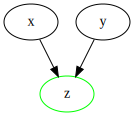

In [9]:
G = gz.Digraph()
G.node('z', color='green')
G.edges(['xz', 'yz'])
G

##### path between $x$ and $y$ which contains no colliders and no conditioning variables
This path **d-connects** the variables $x$ and $y$ (makes them graphically dependent).

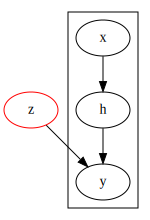

In [10]:
G = gz.Digraph()
G.node('z', color='red')
with G.subgraph(name='cluster') as A:
    A.edges(['xh', 'hy'])
G.edge('z', 'y')
G

#### Effects of Marginalizing and Conditioning

##### Collider

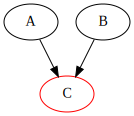

In [11]:
G = gz.Digraph()
G.node('C', color='red')
G.edges(['AC', 'BC'])
G

* **Marginalizing** over a variable can be viewed as not having any information about that variable.
* **Conditioning** on a variable can be viewed as having information about that variable.


* Initially, $A$ and $B$ are unconditionally independent.
* If we marginalize over $C$, we do not know anything about $C$, then we can't induce any dependence between $A$ and $B$.
* If we condition on $C$, we have some information about $C$. If we know something about $C$, we learn something about how the affects of $A$ and $B$ combine to produce that result. Hence, $A$ and $B$ becomes graphically dependent.
* Similarly, if we condition on a descendant of $C$, we learn something about $C$, and thus indirectly form a dependence between $A$ and $B$.

##### Non-collider
In non-collider cases, $C$ can be
1. result of $A$ and cause of $B$.
2. cause of $A$ and result of $B$,
3. root cause of both $A$ and $B$,

In all the cases,

* if we marginalize $C$, we don't have any information about $C$, yet still we know that $A$ and $B$ are related. These relations are
  1. $A$ indirectly causes $B$,
  2. $B$ indirectly causes $A$,
  3. $A$ and $B$ have the same root cause.
In all of these cases, removing $C$ out of the picture doesn't get rid of the fact that $A$ and $B$ are related. Hence, marginalizing $C$ induces a graphical dependence between $A$ and $B$.

* if we condition on $C$, we have information about $C$. In this case,
  1. $C$ explains $B$. Hence, $A$ and $B$ become independent,
  2. $C$ explains $A$. Hence, $A$ and $B$ become independent,
  3. $C$ explains both $A$ and $B$. Hence, $A$ and $B$ become independent.

#### d-Separation Definition
Let $X$, $Y$, $Z$ be disjoint vertex sets on DAG $G$.

For every variable $x \in X$ and $y \in Y$, check every path $U$ between $x$ and $y$. A path $U$ is **blocked** if there is a node $w$ on $U$ such that either

1. $w$ is a collider and neither $w$ nor any of its descendants is in $Z$, or
2. $w$ is not a collider on $U$ and $w$ is in $Z$.

A blocked path cannot induce dependence. If all paths between $X$ and $Y$ are blocked, then $X$ and $Y$ are **d-separated** by $Z$. If $X$ and $Y$ are not d-separated, they are **d-connected**.

\begin{remark}
If the variable sets $X$ and $Y$ are d-separated by $Z$, they are independent conditional on $Z$ in all probability distributions such a graph can represent.
\end{remark}

\begin{remark}
While d-separation implies independence between variables, d-connection does not always imply dependence between variables. Hence, while belief networks are a good tool to ensure independence assumptions in a model, they are not an appropriate tool to ensure dependence assumptions.
\end{remark}

#### Markov Equivalence in BBNs
Two (directed or undirected) graphs are Markov equivalent if they both represent the same set of conditional independence statements.

* **Immorality in a DAG:** A configuration of three nodes $A$, $B$, $C$ such that $C$ is a child of both $A$ and $B$, with $A$ and $B$ not directly connected.
* **Skeleton of a DAG:** Graph obtained by removing directions on the edges.

\begin{remark}
Two DAGs are Markov equivalent iff they have the same skeleton and the same set of immoralities.
\end{remark}


### Causality
* Formally, BNs only make independence statements, not causal ones.
* There is a difference between 'given that we see' (observational evidence) and 'given that we do' (interventional evidence).

#### Simpson's Paradox (3.4.1)
A model of the gender, drug and recovery is $p(G, D, R) = p(R \mid G, D)p(D \mid G)p(G)$. However, if we interpret the experiment from a causal perspective, we intervene and give the drug. In this case, $p(D \mid G)$ should not be used since we give the drug regardless of the gender. Hence, our new model of the experiment should be

$$
\tilde{p}(G, R \mid D) = p(R \mid G, D)p(G).
$$
Then, we can make inference according to the following formula
$$
\tilde{p}(R \mid D) = \sum_G \tilde{p}(R \mid D, G)p(G)
$$

#### do-calculus
In setting any variable into a particular state we need to remove all parental links to that variable. This is called the **do-operator**. With this operator, we differentiate an observational inference $p(x \mid y)$ from a causal inference $p(x \mid do(y))$.

Let all the variables $X = X_I \cup X_O$ be written in terms of intervention variables $X_I$ and observation variables $X_O$. For a belief network $p(X) = \prod_i p(X_i \mid pa(X_i))$, **inferring the effect of setting intervention variables to their corresponding states is equivalent to standard evidential inference in the post intervention distribution**:

$$
p(X_O \mid do(X_{I_1} = x_1), \dots, do(X_{I_k} = x_k)) = \prod_{X_j \in X_O} p(X_j \mid pa(X_j)).
$$

That is, intervention variables are set in particular states, and the corresponding terms $p(X_{I_i} \mid pa(X_{I_i})$ are removed from the original BBN. Graphically, this corresponds to

1. consider each intervention variable
2. cut the connections to its parents
3. set the variable to its intervention state

This operation intuitively corresponds to first setting the causal variables, and then performing the rest of the experiment with the non-causal variables.

#### Influence Diagrams
Another way to represent intervention is by appending a parential decision variable $F_X$ to each variable $X$ on which an intervention can be made. For example, we can modify $p(G, D, R) = p(R \mid G, D)p(D \mid G)p(G)$ to obtain

$$
\tilde{p}(G, D, R, F_D) = p(R \mid G, D)p(D \mid G, F_D)p(F_D)p(G).
$$
where
$$
p(D \mid G, F_D = \varnothing) = p(D \mid pa(D)), \quad p(D \mid G, F_D = d) = 1 \text{ for } D = d
$$

Here, by setting $F_D$ to a state of $D$, we can intervene and set $D$ to a specific value.